In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("cars2010.csv")
test  = pd.read_csv("cars2011.csv")

In [3]:
x_train = train["EngDispl"].values.reshape(-1, 1)
y_train = train["FE"].values.reshape(-1, 1)
x_test  = test["EngDispl"].values.reshape(-1, 1)
y_test  = test["FE"].values.reshape(-1, 1)

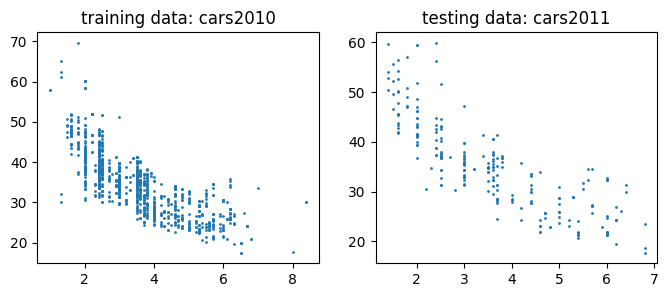

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax[0].scatter(x_train, y_train, s=1)
ax[0].set_title("training data: cars2010")
ax[1].scatter(x_test, y_test, s=1)
ax[1].set_title("testing data: cars2011")
plt.show()

Simple Linear Regression

In [5]:
LR = LinearRegression(n_jobs=-1)
model_1 = LR.fit(x_train, y_train)
y_hat = model_1.predict(x_train)
y_hat_test = model_1.predict(x_test)

polynomial regression with degree of 2

In [6]:
model_2 = make_pipeline(PolynomialFeatures(2), LinearRegression())
model_2.fit(x_train, y_train)
y_hat_2 = model_2.predict(x_train)
y_hat_2_test = model_2.predict(x_test)

In [7]:
print(f"MSE(train) = {mean_squared_error(y_train, y_hat): .4f}")
print(f"MSE(test)  = {mean_squared_error(y_test, y_hat_test): .4f}")
print(f"R2(train)  = {r2_score(y_train, y_hat): .4f}")
print(f"R2(test)   = {r2_score(y_test, y_hat_test): .4f}")

MSE(train) =  21.3451
MSE(test)  =  26.6517
R2(train)  =  0.6200
R2(test)   =  0.6843


In [8]:
print(f"MSE(train) = {mean_squared_error(y_train, y_hat_2): .4f}")
print(f"MSE(test)  = {mean_squared_error(y_test, y_hat_2_test): .4f}")
print(f"R2(train)  = {r2_score(y_train, y_hat_2): .4f}")
print(f"R2(test)   = {r2_score(y_test, y_hat_2_test): .4f}")

MSE(train) =  17.9338
MSE(test)  =  22.2433
R2(train)  =  0.6807
R2(test)   =  0.7365


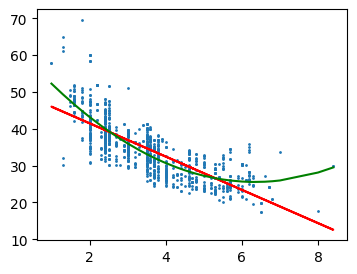

In [9]:
sort_result = pd.DataFrame({"x": x_train.reshape(-1), "y": y_hat_2.reshape(-1)})
sort_result = sort_result.sort_values(by=["x"])

plt.figure(figsize=(4, 3))
plt.scatter(x_train, y_train, s=1)
plt.plot(x_train, y_hat, "red")
plt.plot(sort_result["x"], sort_result["y"], "green")
plt.show()

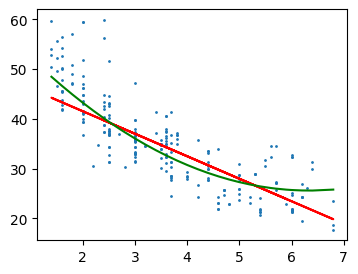

In [10]:
sort_result = pd.DataFrame({"x": x_test.reshape(-1), "y": y_hat_2_test.reshape(-1)})
sort_result = sort_result.sort_values(by=["x"])

plt.figure(figsize=(4, 3))
plt.scatter(x_test, y_test, s=1)
plt.plot(x_test, y_hat_test, "red")
plt.plot(sort_result["x"], sort_result["y"], "green")
plt.show()